In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data

df = pd.read_csv("/content/nifty50_closing_prices.csv")

In [3]:
#converting date column to proper date

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
#Remove duplicates, fix missing values

df = df.sort_index()
df = df[~df.index.duplicated(keep="first")]   # remove duplicate dates
df = df.ffill().bfill()                        # fill missing values
df.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2914.533936,1038.321777,5727.949707,3327.104004,1096.853394,6647.077148,1675.343018,659.398193,1007.435730,214.766174,...,28304.263672,1241.662476,781.448975,133.963882,3665.432861,1262.217896,3665.156982,10402.311523,592.700012,233.428848
2024-01-02,2929.719971,1068.593994,5724.263184,3322.450439,1092.406982,6611.317871,1685.136841,671.232849,1016.037842,216.761581,...,27933.277344,1277.082153,775.320801,133.724396,3638.599121,1243.680786,3686.188232,10144.540039,594.450012,229.539612
2024-01-03,3000.255371,1084.299805,5746.128906,3305.061035,1097.752808,6930.176270,1676.592285,667.144897,1029.463013,219.042023,...,28065.740234,1279.446777,772.404968,129.653290,3550.644531,1210.693848,3681.005371,10051.939453,586.849976,223.033035
2024-01-04,2995.559814,1112.986572,5740.052734,3311.281982,1122.533691,6866.345215,1700.876831,696.121582,1042.092651,215.051224,...,28201.138672,1293.585205,786.539429,128.599579,3526.648193,1213.904907,3707.568359,9955.759766,587.650024,221.320786
2024-01-05,3003.852051,1143.754272,5732.133301,3287.377686,1136.073120,6922.240723,1708.422119,696.627441,1040.799805,215.265030,...,26873.916016,1281.023193,781.794983,128.024826,3595.030762,1214.683472,3700.441650,9957.001953,581.250000,223.375488


In [5]:
# convert daily → monthly (last day price)
monthly = df.resample("M").last()

# monthly returns
returns = monthly.pct_change().dropna()

returns.head()

/tmp/ipython-input-41373709.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M").last()


,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-29,0.045640,0.093446,-0.038698,-0.045962,0.006884,0.031536,-0.020586,-0.053556,-0.040446,0.202050,...,-0.105280,0.118788,0.074644,0.036043,0.073154,-0.044839,-0.019783,-0.027042,-0.126465,0.084597
2024-03-31,-0.026876,0.016168,0.041825,0.008806,-0.025951,0.156625,0.031403,0.115452,0.093693,-0.002401,...,0.006997,0.026997,0.044833,0.106496,-0.053430,-0.020214,0.048946,-0.014481,-0.029168,-0.074238
2024-04-30,-0.044540,-0.012632,-0.064451,0.010240,0.113350,-0.026727,-0.017550,-0.044402,0.076266,0.008217,...,-0.048203,-0.073093,0.015210,0.058710,-0.014356,0.012339,-0.055908,0.022843,0.112171,-0.036867
2024-05-31,0.116754,0.084912,-0.018143,0.001843,-0.003216,0.020340,-0.053498,-0.032620,0.038153,0.033671,...,0.009644,-0.028161,-0.084235,0.013333,-0.032198,-0.027740,-0.096775,-0.005651,0.003253,-0.052336
2024-06-30,-0.068278,0.032727,0.059340,0.022239,0.088715,0.054390,0.039613,0.118244,0.051940,-0.031698,...,0.129243,0.041821,0.075628,0.061698,0.063526,0.164353,0.053499,0.176733,0.121954,0.174920


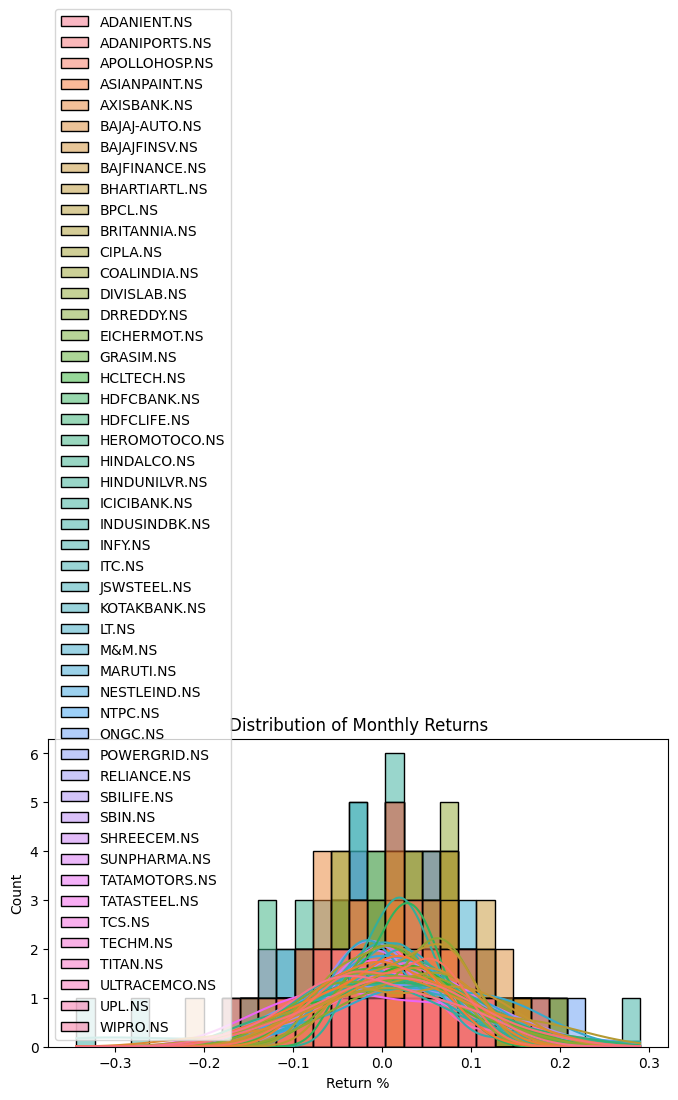

In [18]:
#Distribution of Monthly Returns

plt.figure(figsize=(8,4))
sns.histplot(returns, kde=True)
plt.title("Distribution of Monthly Returns")
plt.xlabel("Return %")
plt.show()

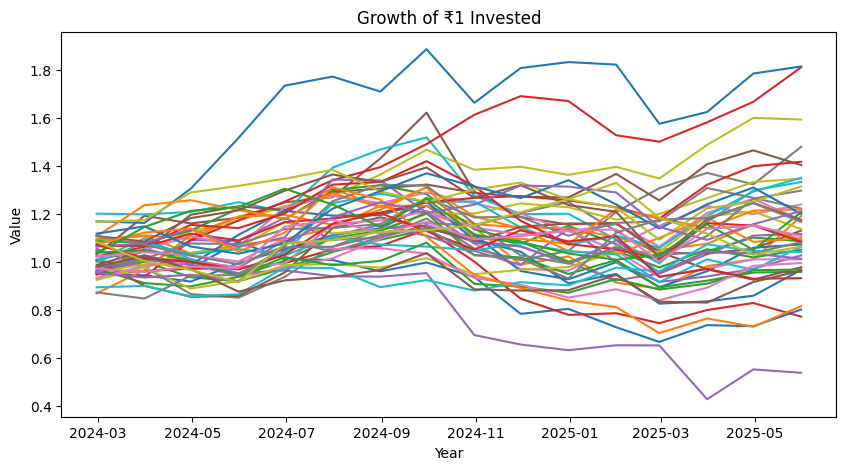

In [16]:
#Cumulative Growth of ₹1

cum = (1 + returns).cumprod()

plt.figure(figsize=(10,5))
plt.plot(cum)
plt.title("Growth of ₹1 Invested")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

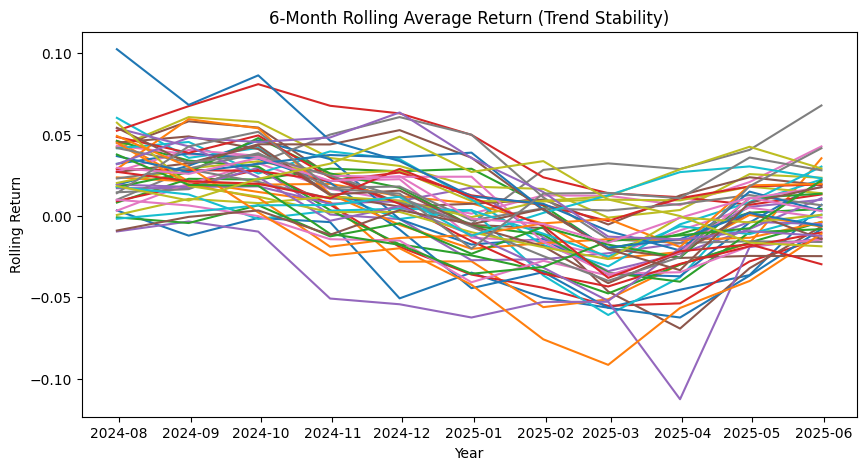

In [19]:
#Month Return Trend (Stability Check)

rolling = returns.rolling(6).mean()

plt.figure(figsize=(10,5))
plt.plot(rolling)
plt.title("6-Month Rolling Average Return (Trend Stability)")
plt.xlabel("Year")
plt.ylabel("Rolling Return")
plt.show()

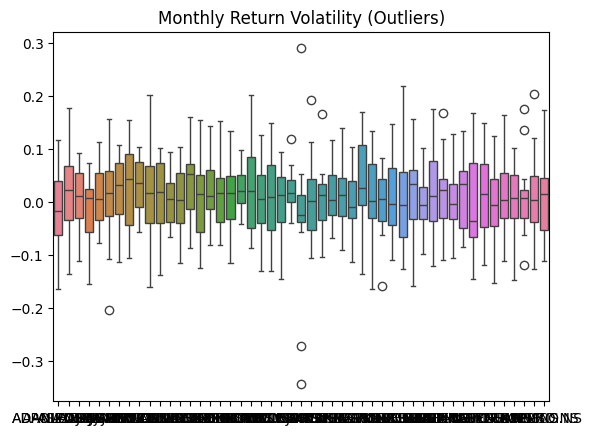

In [25]:
#Boxplot for volatility
sns.boxplot(data=returns)
plt.title("Monthly Return Volatility (Outliers)")
plt.show()

In [6]:
#Simple Stats (Return, Volatility, Sharpe)

annual_returns = returns.mean() * 12
annual_vol = returns.std() * np.sqrt(12)

risk_free = 0.04  # 4%

sharpe = (annual_returns - risk_free) / annual_vol

summary = pd.DataFrame({
    "Annual Return": annual_returns,
    "Annual Volatility": annual_vol,
    "Sharpe Ratio": sharpe
})
summary

,Annual Return,Annual Volatility,Sharpe Ratio
ADANIENT.NS,-0.128846,0.271938,-0.620897
ADANIPORTS.NS,0.169137,0.282267,0.457501
APOLLOHOSP.NS,0.083167,0.207170,0.208367
ASIANPAINT.NS,-0.166255,0.229368,-0.899235
AXISBANK.NS,0.104229,0.211337,0.303918
BAJAJ-AUTO.NS,0.142276,0.319062,0.320554
BAJAJFINSV.NS,0.188590,0.234212,0.634425
BAJFINANCE.NS,0.332498,0.274403,1.065945
BHARTIARTL.NS,0.369475,0.177401,1.857236
BPCL.NS,0.273464,0.347681,0.671490


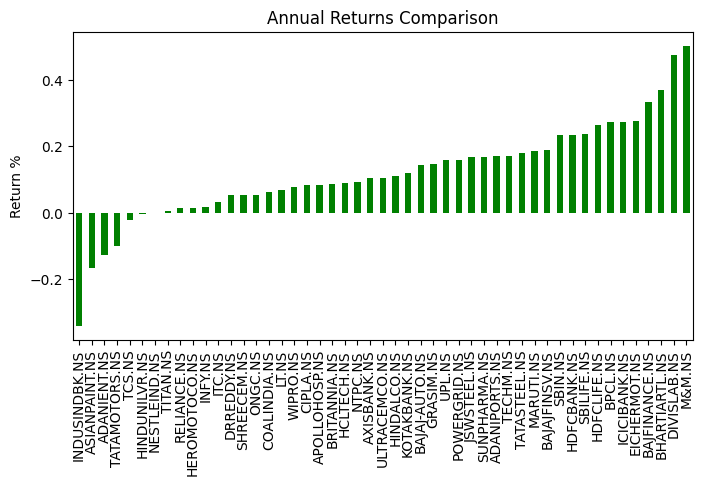

In [22]:
#Top Performing Funds (Bar Chart)
annual_returns.sort_values().plot(kind="bar", figsize=(8,4), color="green")
plt.title("Annual Returns Comparison")
plt.ylabel("Return %")
plt.show()

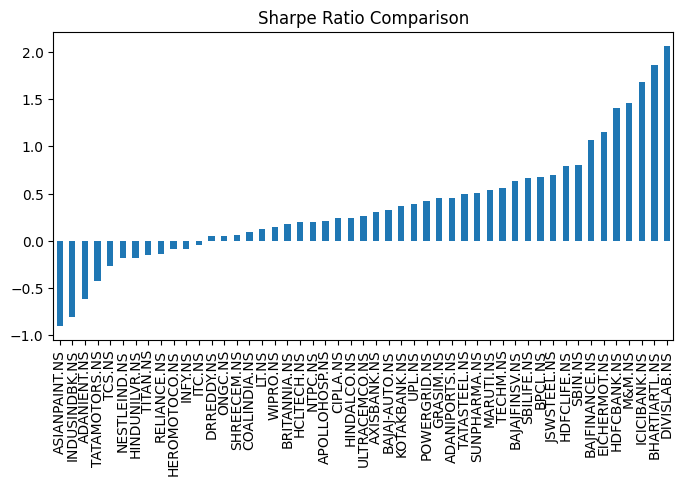

In [23]:
#Sharpe Ratio Comparison
sharpe.sort_values().plot(kind="bar", figsize=(8,4))
plt.title("Sharpe Ratio Comparison")
plt.show()

In [15]:
#Example: Choose 3 funds & allocation of the funds is as follows

#Pick top 3 funds

funds = ["ADANIENT.NS", "ADANIPORTS.NS", "APOLLOHOSP.NS"]  # replace with top 3
data = returns[funds]


'''Interpretation for presentation

Conservative Portfolio – Low risk, low return, suitable for safety.

Balanced Portfolio – Best Sharpe ratio (risk-adjusted return), ideal blend of growth and stability.

Aggressive Portfolio – Highest return but high volatility, suitable for long-term high-risk investors.
'''

#Set 3 portfolio allocations
portfolios = {
    "Conservative": [0.7, 0.2, 0.1],
    "Balanced":     [0.5, 0.3, 0.2],
    "Aggressive":   [0.2, 0.3, 0.5]
}

#Calculate return, risk, Sharpe for each

results = {}

for name, w in portfolios.items():
    w = np.array(w)
    ann_ret = (data.mean() * 12) @ w
    ann_vol = np.sqrt(w @ (data.cov() * 12) @ w)
    sharpe_p = (ann_ret - risk_free) / ann_vol

    results[name] = {
        "Allocation": dict(zip(funds, w)),
        "Annual Return (%)": round(ann_ret * 100, 2),
        "Volatility (%)": round(ann_vol * 100, 2),
        "Sharpe Ratio": round(sharpe_p, 2)
    }

portfolio_df = pd.DataFrame(results).T
portfolio_df

,Allocation,Annual Return (%),Volatility (%),Sharpe Ratio
Conservative,"{'ADANIENT.NS': 0.7, 'ADANIPORTS.NS': 0.2, 'AP...",-4.8,24.89,-0.35
Balanced,"{'ADANIENT.NS': 0.5, 'ADANIPORTS.NS': 0.3, 'AP...",0.3,23.14,-0.16
Aggressive,"{'ADANIENT.NS': 0.2, 'ADANIPORTS.NS': 0.3, 'AP...",6.66,19.64,0.14


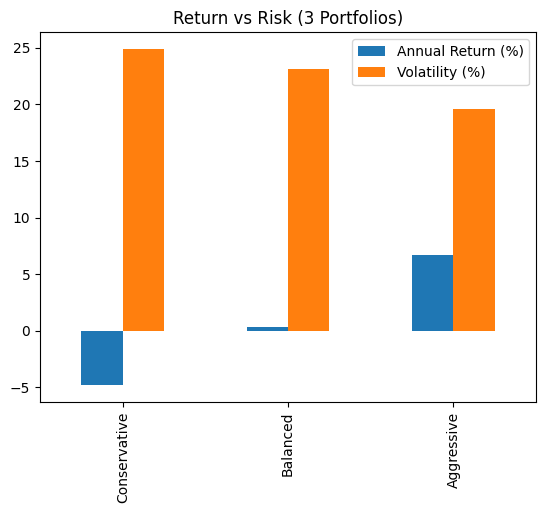

In [12]:
portfolio_df[["Annual Return (%)", "Volatility (%)"]].plot(kind="bar")
plt.title("Return vs Risk (3 Portfolios)")
plt.show()

#Return vs Risk

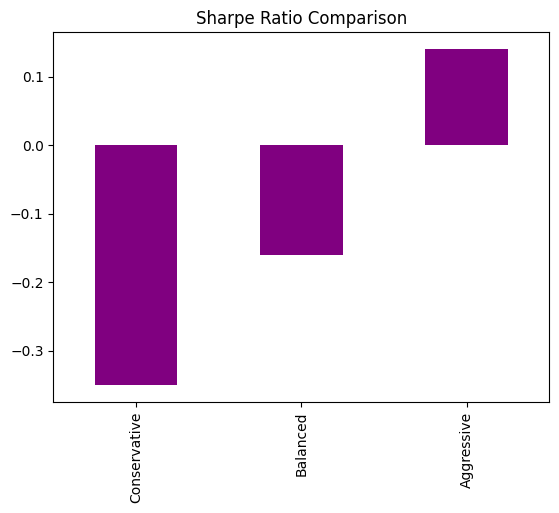

In [13]:
#Sharpe ratio bar
portfolio_df["Sharpe Ratio"].plot(kind="bar", color="purple")
plt.title("Sharpe Ratio Comparison")
plt.show()


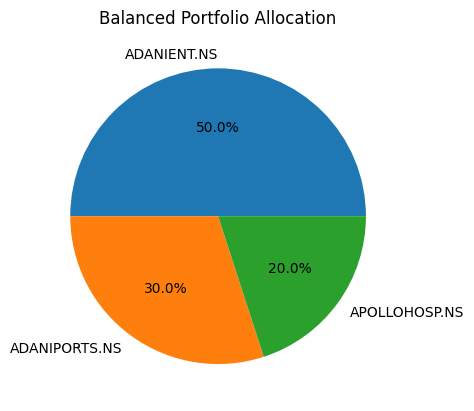

In [14]:
#Allocation Pie (Balanced example)
plt.pie(portfolios["Balanced"], labels=funds, autopct="%1.1f%%")
plt.title("Balanced Portfolio Allocation")
plt.show()
